### Using *raw* data
First I am importing necessary libraries, then importing data, removing the arbitrary index "Unnamed: 0" column, and viewing the first few observations for each.

In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [35]:
train = pd.read_csv('data/red_wine_train.csv')
train.drop('Unnamed: 0',axis=1, inplace=True)
train.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,alcohol_higher,va_high
0,7.0,0.685,0.00,0.067,63.0,0.99790,0.81,9.90,5,0,1
1,8.6,0.685,0.10,0.092,12.0,0.99745,0.65,9.55,6,0,1
2,5.6,0.660,0.00,0.087,11.0,0.99378,0.63,12.80,7,1,1
3,7.7,0.510,0.28,0.087,54.0,0.99800,0.74,9.20,5,0,0
4,8.7,0.310,0.46,0.059,25.0,0.99660,0.76,10.10,6,0,0


In [36]:
test = pd.read_csv('data/red_wine_test.csv')
test.drop('Unnamed: 0',axis=1, inplace=True)
test.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,alcohol_higher,va_high
0,12.6,0.310,0.72,0.072,29.0,0.99870,0.82,9.8,8,0,0
1,11.8,0.330,0.49,0.093,80.0,1.00020,0.76,10.7,7,0,0
2,7.1,0.875,0.05,0.082,14.0,0.99808,0.52,10.2,3,0,1
3,9.0,0.800,0.12,0.083,28.0,0.99836,0.65,10.4,6,0,1
4,7.9,0.690,0.21,0.080,141.0,0.99620,0.51,9.9,5,0,1


Next I am spliting the train and test sets each into dataframes containing only attributes and respective pairs containing only the quality column (the class label).

In [37]:
trainAttr = train.drop('quality',axis=1) #training df without class and index column #x_train

testAttr = test.drop('quality',axis=1) #testing df without class and index column #x_val

trainClass = train['quality'] #training df only class column #y_train

testClass = test['quality'] #testing df only class column #y_val

Here I am just creating a variable for the number of columns which will be used as input to build the model. Then I build a single-layer model and output the summary. Then I use the .compile method to process the optimizer, loss, and metric types used in the model.

In [38]:
n_inputs = [trainAttr.shape[1]] #10 columns = 10 input nodes

In [39]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=n_inputs)]) #build model with one layer
 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='adam',
              loss='mae',
              metrics=['accuracy'])

Now I am fitting the model.

In [41]:
model.fit(trainAttr, trainClass, epochs=5)

Epoch 1/5
40/40 [==============================] - 1s 2ms/step - loss: 12.7104 - accuracy: 0.0000e+00
Epoch 2/5
40/40 [==============================] - 0s 3ms/step - loss: 9.9730 - accuracy: 0.0000e+00
Epoch 3/5
40/40 [==============================] - 0s 2ms/step - loss: 7.3913 - accuracy: 0.0000e+00
Epoch 4/5
40/40 [==============================] - 0s 3ms/step - loss: 5.7539 - accuracy: 0.0000e+00
Epoch 5/5
40/40 [==============================] - 0s 3ms/step - loss: 4.9711 - accuracy: 0.0000e+00


In [42]:
model.fit(trainAttr, trainClass,
 
                   validation_data=(testAttr, testClass),
                    
                   batch_size=1000,
                   epochs=5,  # total epoch
 
                   )

Epoch 1/5
2/2 [==============================] - 0s 321ms/step - loss: 4.7102 - accuracy: 0.0000e+00 - val_loss: 4.7040 - val_accuracy: 0.0000e+00
Epoch 2/5
2/2 [==============================] - 0s 65ms/step - loss: 4.6912 - accuracy: 0.0000e+00 - val_loss: 4.6859 - val_accuracy: 0.0000e+00
Epoch 3/5
2/2 [==============================] - 0s 60ms/step - loss: 4.6713 - accuracy: 0.0000e+00 - val_loss: 4.6686 - val_accuracy: 0.0000e+00
Epoch 4/5
2/2 [==============================] - 0s 66ms/step - loss: 4.6528 - accuracy: 0.0000e+00 - val_loss: 4.6517 - val_accuracy: 0.0000e+00
Epoch 5/5
2/2 [==============================] - 0s 56ms/step - loss: 4.6331 - accuracy: 0.0000e+00 - val_loss: 4.6351 - val_accuracy: 0.0000e+00


Now to oversample (to take care of imbalanced data) we will find the max class value and sample with replacement the other class observations. So we divide the train df into dfs of each class value, and then sample those observations

In [43]:
qual3 = (train[train["quality"]==3])
qual4 = (train[train["quality"]==4]) 
qual5 = (train[train["quality"]==5]) 
qual6 = (train[train["quality"]==6])
qual7 = (train[train["quality"]==7])
qual8 = (train[train["quality"]==8])

#number of samples per class label to determine inbalance
n_qual3 = len(qual3) #8
n_qual4 = len(qual4) #42
n_qual5 = len(qual5) #545
n_qual6 = len(qual6) #510
n_qual7 = len(qual7) #159
n_qual8 = len(qual8) #15

n_max = max(n_qual3, n_qual4, n_qual5, n_qual6, n_qual7, n_qual8) #545

In [44]:
#oversample so that each class has the same number of observations, equal to the number of observations of quality 5
qual3 = qual3.sample(n_max, replace=True)
qual4 = qual4.sample(n_max, replace=True)
qual6 = qual6.sample(n_max, replace=True)
qual7 = qual7.sample(n_max, replace=True)
qual8 = qual8.sample(n_max, replace=True)

In [45]:
train_oversampled = pd.concat([qual3, qual4, qual5, qual6, qual7, qual8])
train_oversampled

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,alcohol_higher,va_high
1006,10.4,0.440,0.42,0.145,48.0,0.99832,0.86,9.9,3,0,0
660,11.6,0.580,0.66,0.074,47.0,1.00080,0.57,9.0,3,0,0
156,6.8,0.815,0.00,0.267,29.0,0.99471,0.51,9.8,3,0,1
660,11.6,0.580,0.66,0.074,47.0,1.00080,0.57,9.0,3,0,0
1006,10.4,0.440,0.42,0.145,48.0,0.99832,0.86,9.9,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1007,7.4,0.360,0.30,0.074,24.0,0.99419,0.70,11.4,8,0,0
817,7.8,0.570,0.09,0.065,45.0,0.99417,0.74,12.7,8,1,0
521,9.4,0.300,0.56,0.080,17.0,0.99640,0.92,11.7,8,1,0
521,9.4,0.300,0.56,0.080,17.0,0.99640,0.92,11.7,8,1,0


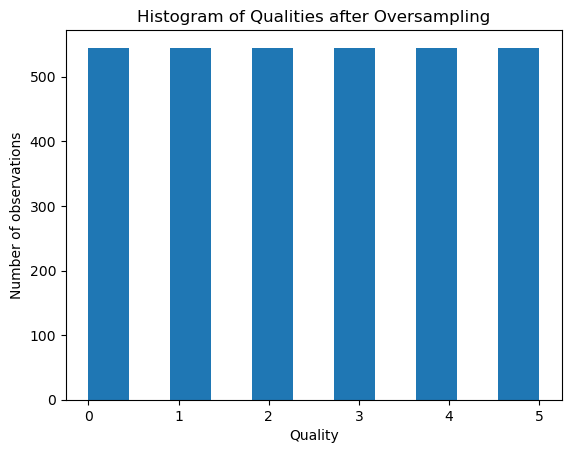

In [57]:
#copied from above ln[6] changing reg to oversampled
trainAttr = train_oversampled.drop('quality',axis=1) #training df without class and index column #x_train

trainClass = train_oversampled['quality'] #training df only class column #y_train

#map to [0,5]
trainClass = trainClass.map({3:0, 4:1, 5:2, 6:3, 7:4, 8:5})
testClass = testClass.map({3:0, 4:1, 5:2, 6:3, 7:4, 8:5})

#plot to show data is now balanced
plt.hist(trainClass, bins=11)
plt.title("Histogram of Qualities after Oversampling")
plt.ylabel('Number of observations')
plt.xlabel('Quality')
plt.show()

In [58]:

# trainClassAttr = trainAttr.map({3:0, 4:1, 5:2, 6:3, 7:4, 8:5})
# testClassAttr = testClassAttr.map({3:0, 4:1, 5:2, 6:3, 7:4, 8:5})

# n_inputs = [trainAttr.shape[1]] #10 columns = 10 input nodes

# model = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=n_inputs)]) #build model with one layer
 
# model.summary()

# model.compile(optimizer='adam',
#               loss='mae',
#               metrics=['accuracy'])
# model.fit(trainAttr, trainClass, epochs=5)
modelOversampled = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=n_inputs),
    tf.keras.layers.Dense(units=6, activation='softmax')
])

modelOversampled.summary()

modelOversampled.compile(optimizer='adam',
              loss='mae',
              metrics=['accuracy'])
modelOversampled.fit(trainAttr, trainClass, epochs=5)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                704       
                                                                 
 dense_14 (Dense)            (None, 6)                 390       
                                                                 
Total params: 1,094
Trainable params: 1,094
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
103/103 [==============================] - 2s 3ms/step - loss: 2.3889 - accuracy: 0.1667
Epoch 2/5
103/103 [==============================] - 0s 3ms/step - loss: 2.3889 - accuracy: 0.1667
Epoch 3/5
103/103 [==============================] - 0s 3ms/step - loss: 2.3889 - accuracy: 0.1667
Epoch 4/5
103/103 [==============================] - 0s 3ms/step - loss: 2.3889 - accuracy: 0.1667
Epoch 5/5
103/103 [==============================] -